# Генерация дополнительных строковых фичей. Практика

## Цели практической работы
1. Потренироваться генерировать дополнительные признаки с помощью lambda-функций.
2. Потренироваться генерировать дополнительные строковые признаки.
3. Подготовить датасет к этапу моделирования. 

## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Сгенерировать дополнительные признаки для этапа моделирования, используя lambda-функции и функции над строками.

## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы начнете генерировать дополнительные признаки.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL-записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
from matplotlib import pyplot as plt

### Задача 1. Изменение шкалы признака

1. Загрузите датасет из `data/vehicles_dataset_upd4.csv`, выведите первые пять записей и список колонок.


In [2]:
# Ваш код здесь
df = pd.read_csv("data/vehicles_dataset_upd4.csv")
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,posting_date,price_category,date,odometer_km,odometer/price,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00,44163.618048,0.499036,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00,96597.654912,3.542852,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00,22608.064512,0.394718,reno,reno,volkswagen: golf r hatchback,4286,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00,188761.567104,8.089034,fayetteville,fayetteville,toyota: rav4,3241,0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00,129495.864960,5.515079,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0


2. С помощью lambda-функции или без неё создайте признак `price_k$`, обозначающий стоимость автомобиля в тысячах долларов. Округлите и выведите получившиеся значения.

In [3]:
# Ваш код здесьprint(n * round(x/n))
df["price_k$"] = df.apply(lambda x: round(round(x.price/1000)), axis=1)
df[["price_k$","price"]]


,price_k$,price
0,55,54990
1,17,16942
2,36,35590
3,14,14500
4,15,14590
...,...,...
9614,4,4495
9615,14,14495
9616,9,8995
9617,32,31900


3. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля в долларах и в округлённых тысячах долларов и подумайте, почему получилось такое значение.

In [4]:
df.price.corr(df["price_k$"])

0.9997987024374038

### Задача 2. Построение категориального признака на основе количественного

1. Выведите описательные статистики для переменной `year`.

In [5]:
# Ваш код здесь
df.year.describe()

count    9619.000000
mean     2011.555879
std         6.385814
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

2. Создайте с помощью lambda-функции новый признак `age_category`, обозначающий возрастную категорию автомобиля, выведите его.

Будет три категории:
- `old` — автомобиль старше 2013 года выпуска;
- `average`— автомобиль, выпущенный между 2006 и 2013 годом;
- `new` — автомобиль до 2006 года выпуска.

In [6]:
df["age_category"] = df.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year<2006 else "average"), axis=1)
df["age_category"] 

0           new
1           new
2           new
3       average
4       average
         ...   
9614        old
9615    average
9616    average
9617        new
9618        new
Name: age_category, Length: 9619, dtype: object

3. Выведите значения года выпуска автомобиля и получившуюся возрастную категорию автомобиля, чтобы убедиться в правильности распределения категорий.

In [7]:
# Ваш код здесь
df[["age_category","year"]] 

,age_category,year
0,new,2020
1,new,2016
2,new,2017
3,average,2013
4,average,2012
...,...,...
9614,old,2002
9615,average,2008
9616,average,2011
9617,new,2015


1. На одном полотне постройте графики распределения года производства автомобиля для каждой из возрастной категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от возрастной категории: зелёный, оранжевый и красный для новых, средних и старых автомобилей соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для возрастной категории. 


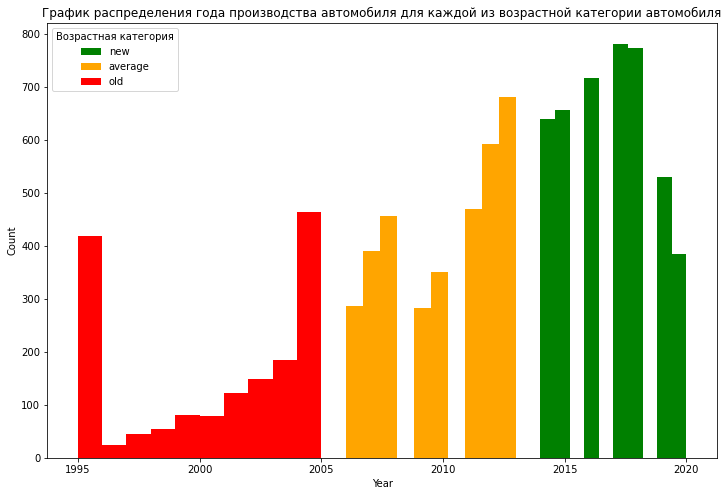

In [8]:
# Ваш код здесь
colors = {"new":"green", "average":"orange", "old":"red"}
fig, ax = plt.subplots(figsize=(12,8))
for age_category in colors:
    color = colors[age_category]
    data = df[df["age_category"] == age_category]
    ax.hist(data.year,color=color,label = age_category)
plt.legend(loc="upper left",title="Возрастная категория")
plt.title("График распределения года производства автомобиля для каждой из возрастной категории автомобиля")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show;

### Задача 3. Построение признаков из строк 

1. Создайте новый признак `model_len`, обозначающий количество символов (длину строки) в модели автомобиля, выведите его.

In [20]:
# Ваш код здесь
df['model_len'] = df.apply(lambda x: len(x.model), axis=1)
df[['model_len','model']]


,model_len,model
0,22,2500 crew cab big horn
1,20,explorer 4wd 4dr xlt
2,16,golf r hatchback
3,4,rav4
4,22,1 series 128i coupe 2d
...,...,...
9614,4,rav4
9615,8,wrangler
9616,25,a3 2.0t premium plus pzev
9617,7,cayenne


2. С помощью `value_counts` посмотрите на самое популярное количество символов в модели автомобиля.

In [21]:
# Ваш код здесь
df.model_len.value_counts()

6      1004
5       900
7       724
8       681
4       647
       ... 
187       1
168       1
58        1
76        1
186       1
Name: model_len, Length: 65, dtype: int64


3. Создайте новый признак `model_word_count`, обозначающий количество слов в модели автомобиля, выведите его.

In [30]:
# Ваш код здесь


df['model_word_count'] = df['model'].apply(lambda x: len(x.split(" ")))


4. С помощью `value_counts` посмотрите на самое популярное количество слов в модели автомобиля.

In [32]:
# Ваш код здесь
df.model_word_count.value_counts().head()

1    4289
2    2184
3    1355
4    1182
5     498
Name: model_word_count, dtype: int64

### Задача 4. Создание нескольких признаков из категориальной переменной

1. Для каждого выбранного производителя автомобиля создайте отдельный признак, содержащий 1, если данный автомобиль произведён именно этим производителем, и 0, если нет. Назовите признаки согласно шаблону: для `audi` это будет `is_audi` и так далее.

In [35]:
# Допишите код

manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
        col_name = "is_" + manufacturer
        
        df[col_name] = df.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis =1 )

2. Выведите 7 последних колонок, чтобы убедиться в правильности вывода.

In [38]:
# Ваш код здесь
df.iloc[:,-7:]


,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9614,0,0,0,1,0,0,0
9615,0,0,0,0,1,0,0
9616,1,0,0,0,0,0,0
9617,0,0,0,0,0,0,0


3. Выведите только те автомобили, которые произведены audi. Сделайте это на основе нового признака `is_audi`.

In [46]:
# Ваш код здесь
df[df['is_audi']==1].model


58                               q5
104                              q7
125     q5 premium sport utility 4d
195                              a6
251        s5 premium plus sedan 4d
                   ...             
9508                             s6
9551                q7 premium plus
9559                             q5
9570         q7 3.6 premium quattro
9616      a3 2.0t premium plus pzev
Name: model, Length: 193, dtype: object

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

**Ответы для самостоятельной проверки**

### Задача 1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1

df = pd.read_csv('data/vehicles_dataset_upd4.csv')
df.head()

In [ ]:
# 1

df.columns

In [ ]:
# 2 v1

df['price_k$'] = round(df.price / 1000)
df['price_k$']

In [ ]:
# 2 v2

df['price_k$'] = df.apply(lambda x: round(x.price / 1000) , axis=1)
df['price_k$']

In [ ]:
# 3

df['price'].corr(df['price_k$'])

### Задача 2.

In [ ]:
# 1

df['year'].describe()

In [ ]:
# 2

df['age_category'] =  df.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
df['age_category']

In [ ]:
# 3

df[['year', 'age_category']]

In [ ]:
# 4

colors = {'average': 'orange', 'old': 'red', 'new': 'green'}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_category'] == age_category]

    ax.hist(data['year'], color=color)
    
plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Возрастная категория автомобиля в зависимости от года выпуска автомобиля')
plt.legend(colors, title="Возрастная категория");

### Задача 3.

In [ ]:
# 1

df['model_len'] = df.apply(lambda x: len(x.model) , axis=1)
df['model_len']

In [ ]:
# 2

df['model_len'].value_counts()

In [ ]:
# 3

df['model_word_count'] = df.apply(lambda x: len(x.model.split(' ')), axis=1)
df['model_word_count']

In [ ]:
# 4

df['model_word_count'].value_counts()

### Задача 4.

In [ ]:
# 1

manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    col_name = 'is_' + manufacturer

    df[col_name] = df.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis=1)

In [ ]:
# 2

df.iloc[:, -7:]

In [ ]:
# 3

df[df['is_audi'] == 1]